In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

In [2]:
df_transactions_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "ELPHI_transactions_ohne_vorname.csv")

df_history_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +
                                    "ELPHI_history_ohne_vorname.csv")

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_8784\3453601399.py:1: DtypeWarning: Columns (13,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions_wofirstname = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/Rohdaten/" +


In [3]:
df_privatkunden_iids = pd.read_csv("C:/Users/felix.oechslein/Desktop/Daten, 13.12.22/" +
                                    "privatkunden.iid.ELPHI.csv", index_col = [0])

# Herausfiltern aller iids die Privatkunden sind und im Jahr x ihre erste Bestellung tätigten

In [4]:
df_transactions_wofirstname

,mandator,id,iid,attrtype,key,itemkey,status,productid,productname,modifiedprovider,createdprovider,startdate,quantity,discountname,saleschannelname,price,discountgroup,discountamount,pricetotal
0,174363396,274038766,273615118,TI,TEST_200000561,TEST_1169754_1_1_1,Order,JET_1_12860517,Herbert Pixner Projekt,20221107071515,20220920192257,2.022091e+13,1.0,NaN,Internet,47.0,NaN,NaN,37.6
1,174363396,276586136,273615118,TI,TEST_11696,TEST_1169754_1_1_1,Order,JET_1_27092,Orchestre National de France / Trifonov / Măce...,20221107071520,20220929231514,2.022113e+13,1.0,NaN,Internet,47.0,NaN,NaN,37.6
2,174363396,278465954,278172159,TI,JET_1_a1516015,JET_1_a1516015_1_5_0,Order,JET_1_3826,NDR Elbphilharmonie Orchester,20221014072737,20221011174600,2.023042e+13,1.0,NaN,Internet,48.0,NaN,NaN,48.0
3,174363396,278465964,278172159,TI,JET_1_a1516015,JET_1_a1516015_1_6_0,Order,JET_1_3826,NDR Elbphilharmonie Orchester,20221014072737,20221011174600,2.023042e+13,1.0,NaN,Internet,48.0,NaN,NaN,48.0
4,174363396,278465974,166335250,OR,JET_1_a1516016,NaN,Order,NaN,NaN,20221014072737,20221011174600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037137,174363396,278465744,167645895,TI,JET_1_r350861,JET_1_r350861_1_0,Reservation,JET_1_4091,"Georgijs Osokins, Klavier",20221014072737,20221011172913,2.023011e+13,1.0,Veranstalterkarte,Admin,27.0,Allgemein,NaN,0.0
5037138,174363396,278465759,167645895,TI,JET_1_r350861,JET_1_r350861_2_0,Reservation,JET_1_4091,"Georgijs Osokins, Klavier",20221014072737,20221011172913,2.023011e+13,1.0,Veranstalterkarte,Admin,27.0,Allgemein,NaN,0.0
5037139,174363396,278465772,278170043,TI,JET_1_a1516007,JET_1_a1516007_1_1_0,Order,JET_1_3785,Orgel pur,20221014072737,20221011173000,2.022101e+13,1.0,REDticket U30 € 10,Internet,38.0,Allgemein,NaN,10.0
5037140,174363396,278465771,278170043,OR,JET_1_a1516007,NaN,Order,NaN,NaN,20221014072737,20221011173000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Transaktions-Daten bereinigen

df_t_bereinigt = df_transactions_wofirstname[["iid", "key", "attrtype", "status", "pricetotal", "createdprovider"]]
df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")
df_t_bereinigt = df_t_bereinigt.query('attrtype == "TI"')
df_t_bereinigt = df_t_bereinigt.query('status == "Buchung" or status == "Order"')
df_t_bereinigt = df_t_bereinigt.query('pricetotal >= 0.01')
searchfor = ['TEST']
#searchfor = ['TEST', 'JET', "WS"]
df_t_bereinigt = df_t_bereinigt[~df_t_bereinigt["key"].str.contains('|'.join(searchfor))]
df_t_bereinigt.head()

C:\Users\felix.oechslein\AppData\Local\Temp\ipykernel_8784\1303674657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_bereinigt["pricetotal"] = pd.to_numeric(df_t_bereinigt["pricetotal"], errors = "coerce")


,iid,key,attrtype,status,pricetotal,createdprovider
2,278172159,JET_1_a1516015,TI,Order,48.0,20221011174600
3,278172159,JET_1_a1516015,TI,Order,48.0,20221011174600
6,164989410,JET_1_a1511645,TI,Order,18.0,20221004092200
9,187970535,JET_1_a1516031,TI,Order,5.0,20221011180300
14,180392654,WS-1342745,TI,Order,75.0,20220701162008


<AxesSubplot:>

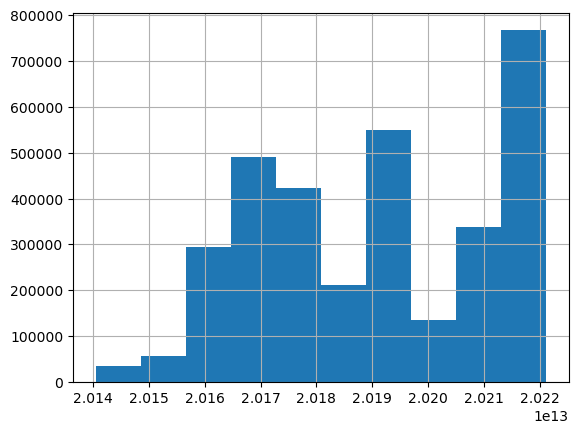

In [65]:
df_t_bereinigt["createdprovider"].hist()

In [66]:
df_history_wofirstname

,mandator,id,iid,attrtype,akey,text,creation
0,174363396,264631559,165888639,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001502
1,174363396,264631563,172138098,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001511
2,174363396,284963773,186134667,NO,284155779,|msg=2223 NL Konzerte 221115 Empfehlungen Deze...,20221117073119
3,174363396,264631564,175952454,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001511
4,174363396,264631565,180175750,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001515
...,...,...,...,...,...,...,...
11788067,174363396,264631554,164898093,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001444
11788068,174363396,284966178,179979083,NO,283853037,|msg=2223 NL Konzerte 221115 Empfehlungen Deze...,20221117074807
11788069,174363396,264631555,167477490,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001449
11788070,174363396,264631558,179904676,NO,262370023,|msg=2122 NL Konzerte 220712 Afrofuturism|user...,20220714001502


In [68]:
df_history_wofirstname["attrtype"].value_counts()

HY    5662042
NO    5546618
NC     539811
SB      21999
HB      17274
SC        328
Name: attrtype, dtype: int64

In [77]:
df_history_wofirstname["creation"].min()

20220203124603

In [78]:
df_history_wofirstname["creation"].max()

20221213161917